In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [3]:
# бінарна класифікація
X_binary, y_binary = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

binary_classification_data = pd.DataFrame(data=X_binary, columns=[f'Attribute{i}' for i in range(1, 3)])
binary_classification_data['Label'] = y_binary

# мультикласова класифікація
X_multiclass, y_multiclass = make_classification(n_samples=5000, n_classes=3, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

multiclass_classification_data = pd.DataFrame(data=X_multiclass, columns=[f'Attribute{i}' for i in range(1, 3)])
multiclass_classification_data['Label'] = y_multiclass


# розділяємо дані на тренувальний та тестовий набори
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
X_multiclass_train, X_multiclass_test, y_multiclass_train, y_multiclass_test = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=42)

In [4]:
# Для бінарної класифікації
model_binary = Sequential([
    Dense(32, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   
])

model_binary.compile(optimizer='adam', 
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])

history_binary = model_binary.fit(X_binary_train, y_binary_train, epochs=50, batch_size=8, validation_data=(X_binary_test, y_binary_test))

# Для мультикласової класифікації
model_multiclass = Sequential([
    Dense(32, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  
])

model_multiclass.compile(optimizer='adam', 
                         loss='sparse_categorical_crossentropy', 
                         metrics=['accuracy'])

history_multiclass = model_multiclass.fit(X_multiclass_train, y_multiclass_train, epochs=50, batch_size=8, validation_data=(X_multiclass_test, y_multiclass_test))

Epoch 1/50
500/500 [==============================] - 4s 5ms/step - loss: 0.3856 - accuracy: 0.8505 - val_loss: 0.3158 - val_accuracy: 0.8760
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3066 - accuracy: 0.8727 - val_loss: 0.2983 - val_accuracy: 0.8810
Epoch 3/50
500/500 [==============================] - 2s 5ms/step - loss: 0.2860 - accuracy: 0.8763 - val_loss: 0.2756 - val_accuracy: 0.8860
Epoch 4/50
500/500 [==============================] - 2s 5ms/step - loss: 0.2628 - accuracy: 0.8848 - val_loss: 0.2579 - val_accuracy: 0.8880
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2446 - accuracy: 0.8985 - val_loss: 0.2463 - val_accuracy: 0.8940
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2327 - accuracy: 0.9072 - val_loss: 0.2342 - val_accuracy: 0.9050
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2254 - accuracy: 0.9118 - val_loss: 0.2281 - val_accuracy: 0.9040
Epoch 

In [5]:
# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model_binary.evaluate(X_binary_test, y_binary_test, verbose=2)
print('\nТочність бінарної на тестовому наборі:', test_acc, '\n')

test_loss, test_acc = model_multiclass.evaluate(X_multiclass_test, y_multiclass_test, verbose=2)
print('\nТочність мультикласової на тестовому наборі:', test_acc)

32/32 - 0s - loss: 0.2137 - accuracy: 0.9110 - 430ms/epoch - 13ms/step

Точність бінарної на тестовому наборі: 0.9110000133514404 

32/32 - 0s - loss: 0.2911 - accuracy: 0.8860 - 446ms/epoch - 14ms/step

Точність мультикласової на тестовому наборі: 0.8859999775886536


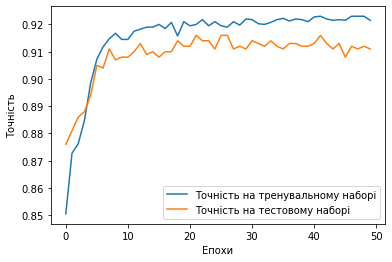

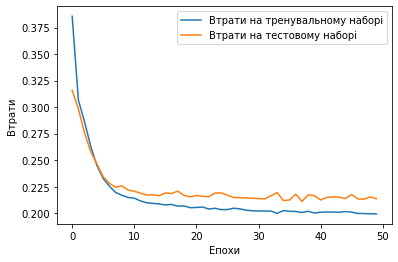

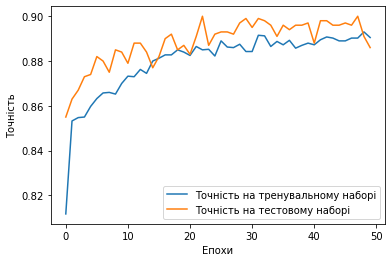

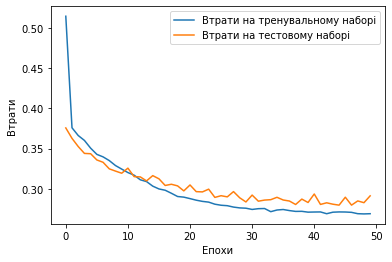

In [6]:
# Функція для візуалізації процесу навчання
def plot_history(history):
    # Графіки точності
    plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
    plt.plot(history.history['val_accuracy'], label='Точність на тестовому наборі')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()
    plt.show()

    # Графіки втрат
    plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
    plt.plot(history.history['val_loss'], label='Втрати на тестовому наборі')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()
    plt.show()

# Візуалізація для бінарної класифікації
plot_history(history_binary)

# Візуалізація для мультикласової класифікації
plot_history(history_multiclass)

In [9]:
# четвертий шар
model_large_b = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_large_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_large_b.fit(X_binary_train, y_binary_train, epochs=50, batch_size=8, validation_data=(X_binary_test, y_binary_test))

model_large_m = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Replace num_classes with the actual number of classes
])

model_large_m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_large_m.fit(X_multiclass_train, y_multiclass_train, epochs=50, batch_size=8, validation_data=(X_multiclass_test, y_multiclass_test))


Epoch 1/50
500/500 [==============================] - 5s 5ms/step - loss: 0.3096 - accuracy: 0.8727 - val_loss: 0.2497 - val_accuracy: 0.8980
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2306 - accuracy: 0.9062 - val_loss: 0.2322 - val_accuracy: 0.8980
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2172 - accuracy: 0.9115 - val_loss: 0.2215 - val_accuracy: 0.9070
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2145 - accuracy: 0.9180 - val_loss: 0.2168 - val_accuracy: 0.9110
Epoch 5/50
500/500 [==============================] - 2s 5ms/step - loss: 0.2122 - accuracy: 0.9168 - val_loss: 0.2263 - val_accuracy: 0.9090
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2105 - accuracy: 0.9187 - val_loss: 0.2260 - val_accuracy: 0.9130
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2086 - accuracy: 0.9172 - val_loss: 0.2200 - val_accuracy: 0.9080
Epoch 

500/500 [==============================] - 2s 4ms/step - loss: 0.3055 - accuracy: 0.8780 - val_loss: 0.3200 - val_accuracy: 0.8790
Epoch 9/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2988 - accuracy: 0.8788 - val_loss: 0.3083 - val_accuracy: 0.8800
Epoch 10/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2942 - accuracy: 0.8785 - val_loss: 0.3096 - val_accuracy: 0.8860
Epoch 11/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2890 - accuracy: 0.8857 - val_loss: 0.2946 - val_accuracy: 0.9000
Epoch 12/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2888 - accuracy: 0.8815 - val_loss: 0.2931 - val_accuracy: 0.8890
Epoch 13/50
500/500 [==============================] - 2s 5ms/step - loss: 0.2838 - accuracy: 0.8852 - val_loss: 0.3508 - val_accuracy: 0.8320
Epoch 14/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2837 - accuracy: 0.8875 - val_loss: 0.2876 - val_accuracy: 0.8920
Epoch 15/50


In [10]:
# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model_large_b.evaluate(X_binary_test, y_binary_test, verbose=2)
print('\nТочність бінарної на тестовому наборі:', test_acc, '\n')

test_loss, test_acc = model_large_m.evaluate(X_multiclass_test, y_multiclass_test, verbose=2)
print('\nТочність мультикласової на тестовому наборі:', test_acc)

32/32 - 1s - loss: 0.2171 - accuracy: 0.9110 - 517ms/epoch - 16ms/step

Точність бінарної на тестовому наборі: 0.9110000133514404 

32/32 - 0s - loss: 0.2840 - accuracy: 0.8970 - 497ms/epoch - 16ms/step

Точність мультикласової на тестовому наборі: 0.8970000147819519


In [11]:
# Збільшення кількості нейронів у кожному шарі
model_more_neurons_b = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_more_neurons_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_more_neurons_b.fit(X_binary_train, y_binary_train, epochs=50, batch_size=8, validation_data=(X_binary_test, y_binary_test))


model_more_neurons_m = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model_more_neurons_m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_more_neurons_m.fit(X_multiclass_train, y_multiclass_train, epochs=50, batch_size=8, validation_data=(X_multiclass_test, y_multiclass_test))

Epoch 1/50
500/500 [==============================] - 5s 6ms/step - loss: 0.3136 - accuracy: 0.8760 - val_loss: 0.2601 - val_accuracy: 0.8980
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2381 - accuracy: 0.9070 - val_loss: 0.2486 - val_accuracy: 0.8940
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2225 - accuracy: 0.9103 - val_loss: 0.2252 - val_accuracy: 0.9060
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2174 - accuracy: 0.9178 - val_loss: 0.2175 - val_accuracy: 0.9120
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2142 - accuracy: 0.9145 - val_loss: 0.2286 - val_accuracy: 0.9050
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2133 - accuracy: 0.9168 - val_loss: 0.2147 - val_accuracy: 0.9090
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2110 - accuracy: 0.9215 - val_loss: 0.2164 - val_accuracy: 0.9080
Epoch 

500/500 [==============================] - 2s 4ms/step - loss: 0.3062 - accuracy: 0.8745 - val_loss: 0.3067 - val_accuracy: 0.8860
Epoch 9/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3021 - accuracy: 0.8770 - val_loss: 0.3116 - val_accuracy: 0.8830
Epoch 10/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2944 - accuracy: 0.8783 - val_loss: 0.2979 - val_accuracy: 0.8940
Epoch 11/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.8795 - val_loss: 0.3043 - val_accuracy: 0.8880
Epoch 12/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2897 - accuracy: 0.8860 - val_loss: 0.3000 - val_accuracy: 0.8910
Epoch 13/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2872 - accuracy: 0.8840 - val_loss: 0.3086 - val_accuracy: 0.8850
Epoch 14/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2872 - accuracy: 0.8827 - val_loss: 0.3062 - val_accuracy: 0.8800
Epoch 15/50


In [12]:
# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model_more_neurons_b.evaluate(X_binary_test, y_binary_test, verbose=2)
print('\nТочність бінарної на тестовому наборі:', test_acc, '\n')

test_loss, test_acc = model_more_neurons_m.evaluate(X_multiclass_test, y_multiclass_test, verbose=2)
print('\nТочність мультикласової на тестовому наборі:', test_acc)

32/32 - 1s - loss: 0.2151 - accuracy: 0.9120 - 573ms/epoch - 18ms/step

Точність бінарної на тестовому наборі: 0.9120000004768372 

32/32 - 1s - loss: 0.2972 - accuracy: 0.8880 - 519ms/epoch - 16ms/step

Точність мультикласової на тестовому наборі: 0.8880000114440918


In [13]:
# Використання оптимізатора Adam з callback
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

callback = LearningRateScheduler(scheduler)

model_adam_callback_b = Sequential([
    Dense(32, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_adam_callback_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_adam_callback_b.fit(X_binary_train, y_binary_train, epochs=50, batch_size=8, validation_data=(X_binary_test, y_binary_test), callbacks=[callback])


model_adam_callback_m = Sequential([
    Dense(32, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='sigmoid')
])

model_adam_callback_m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_adam_callback_m.fit(X_multiclass_train, y_multiclass_train, epochs=50, batch_size=8, validation_data=(X_multiclass_test, y_multiclass_test), callbacks=[callback])


Epoch 1/50
500/500 [==============================] - 4s 4ms/step - loss: 0.3665 - accuracy: 0.8500 - val_loss: 0.3024 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2920 - accuracy: 0.8770 - val_loss: 0.2816 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2702 - accuracy: 0.8870 - val_loss: 0.2634 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2514 - accuracy: 0.8957 - val_loss: 0.2547 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2363 - accuracy: 0.9045 - val_loss: 0.2395 - val_accuracy: 0.9030 - lr: 0.0010
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2268 - accuracy: 0.9100 - val_loss: 0.2322 - val_accuracy: 0.9070 - lr: 0.0010
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - lo

500/500 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8480 - val_loss: 0.3526 - val_accuracy: 0.8620 - lr: 0.0010
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3611 - accuracy: 0.8520 - val_loss: 0.3459 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3512 - accuracy: 0.8558 - val_loss: 0.3491 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3464 - accuracy: 0.8575 - val_loss: 0.3367 - val_accuracy: 0.8770 - lr: 0.0010
Epoch 6/50
500/500 [==============================] - 2s 5ms/step - loss: 0.3397 - accuracy: 0.8612 - val_loss: 0.3321 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3366 - accuracy: 0.8648 - val_loss: 0.3343 - val_accuracy: 0.8780 - lr: 0.0010
Epoch 8/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3314 

In [14]:
# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model_adam_callback_b.evaluate(X_binary_test, y_binary_test, verbose=2)
print('\nТочність бінарної на тестовому наборі:', test_acc, '\n')

test_loss, test_acc = model_adam_callback_m.evaluate(X_multiclass_test, y_multiclass_test, verbose=2)
print('\nТочність мультикласової на тестовому наборі:', test_acc)

32/32 - 0s - loss: 0.2141 - accuracy: 0.9120 - 456ms/epoch - 14ms/step

Точність бінарної на тестовому наборі: 0.9120000004768372 

32/32 - 1s - loss: 0.2970 - accuracy: 0.8890 - 539ms/epoch - 17ms/step

Точність мультикласової на тестовому наборі: 0.8889999985694885


In [15]:
# Тестування моделі при тренуванні протягом 300 епох
model_binary.fit(X_binary_train, y_binary_train, epochs=300, batch_size=8, validation_data=(X_binary_test, y_binary_test))

model_multiclass.fit(X_multiclass_train, y_multiclass_train, epochs=300, batch_size=8, validation_data=(X_multiclass_test, y_multiclass_test))

Epoch 1/300
500/500 [==============================] - 2s 5ms/step - loss: 0.2006 - accuracy: 0.9225 - val_loss: 0.2148 - val_accuracy: 0.9140
Epoch 2/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2000 - accuracy: 0.9220 - val_loss: 0.2127 - val_accuracy: 0.9090
Epoch 3/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1995 - accuracy: 0.9240 - val_loss: 0.2131 - val_accuracy: 0.9120
Epoch 4/300
500/500 [==============================] - 2s 3ms/step - loss: 0.1996 - accuracy: 0.9218 - val_loss: 0.2149 - val_accuracy: 0.9120
Epoch 5/300
500/500 [==============================] - 2s 3ms/step - loss: 0.1984 - accuracy: 0.9235 - val_loss: 0.2183 - val_accuracy: 0.9110
Epoch 6/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2001 - accuracy: 0.9208 - val_loss: 0.2137 - val_accuracy: 0.9160
Epoch 7/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1997 - accuracy: 0.9218 - val_loss: 0.2153 - val_accuracy: 0.9120

Epoch 58/300
500/500 [==============================] - 2s 3ms/step - loss: 0.1961 - accuracy: 0.9262 - val_loss: 0.2149 - val_accuracy: 0.9090
Epoch 59/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1970 - accuracy: 0.9230 - val_loss: 0.2159 - val_accuracy: 0.9110
Epoch 60/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1958 - accuracy: 0.9265 - val_loss: 0.2187 - val_accuracy: 0.9130
Epoch 61/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1971 - accuracy: 0.9208 - val_loss: 0.2134 - val_accuracy: 0.9090
Epoch 62/300
500/500 [==============================] - 2s 5ms/step - loss: 0.1965 - accuracy: 0.9240 - val_loss: 0.2151 - val_accuracy: 0.9120
Epoch 63/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1967 - accuracy: 0.9222 - val_loss: 0.2122 - val_accuracy: 0.9110
Epoch 64/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1959 - accuracy: 0.9222 - val_loss: 0.2150 - val_accuracy:

Epoch 115/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1940 - accuracy: 0.9233 - val_loss: 0.2119 - val_accuracy: 0.9130
Epoch 116/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1951 - accuracy: 0.9243 - val_loss: 0.2160 - val_accuracy: 0.9080
Epoch 117/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1941 - accuracy: 0.9250 - val_loss: 0.2111 - val_accuracy: 0.9130
Epoch 118/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1950 - accuracy: 0.9243 - val_loss: 0.2136 - val_accuracy: 0.9120
Epoch 119/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1923 - accuracy: 0.9258 - val_loss: 0.2169 - val_accuracy: 0.9100
Epoch 120/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1959 - accuracy: 0.9255 - val_loss: 0.2103 - val_accuracy: 0.9100
Epoch 121/300
500/500 [==============================] - 2s 3ms/step - loss: 0.1936 - accuracy: 0.9227 - val_loss: 0.2125 - val_ac

500/500 [==============================] - 2s 4ms/step - loss: 0.1925 - accuracy: 0.9252 - val_loss: 0.2143 - val_accuracy: 0.9130
Epoch 172/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1933 - accuracy: 0.9250 - val_loss: 0.2102 - val_accuracy: 0.9120
Epoch 173/300
500/500 [==============================] - 1s 3ms/step - loss: 0.1929 - accuracy: 0.9250 - val_loss: 0.2080 - val_accuracy: 0.9150
Epoch 174/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1940 - accuracy: 0.9252 - val_loss: 0.2095 - val_accuracy: 0.9130
Epoch 175/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1933 - accuracy: 0.9255 - val_loss: 0.2084 - val_accuracy: 0.9130
Epoch 176/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1931 - accuracy: 0.9237 - val_loss: 0.2105 - val_accuracy: 0.9120
Epoch 177/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1929 - accuracy: 0.9245 - val_loss: 0.2100 - val_accuracy: 0.9100

500/500 [==============================] - 2s 3ms/step - loss: 0.1928 - accuracy: 0.9255 - val_loss: 0.2102 - val_accuracy: 0.9120
Epoch 228/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1925 - accuracy: 0.9260 - val_loss: 0.2117 - val_accuracy: 0.9130
Epoch 229/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1923 - accuracy: 0.9255 - val_loss: 0.2107 - val_accuracy: 0.9130
Epoch 230/300
500/500 [==============================] - 2s 3ms/step - loss: 0.1928 - accuracy: 0.9243 - val_loss: 0.2123 - val_accuracy: 0.9130
Epoch 231/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1933 - accuracy: 0.9225 - val_loss: 0.2107 - val_accuracy: 0.9090
Epoch 232/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1929 - accuracy: 0.9250 - val_loss: 0.2091 - val_accuracy: 0.9120
Epoch 233/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1926 - accuracy: 0.9255 - val_loss: 0.2105 - val_accuracy: 0.9160

500/500 [==============================] - 2s 4ms/step - loss: 0.1917 - accuracy: 0.9227 - val_loss: 0.2073 - val_accuracy: 0.9180
Epoch 284/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1931 - accuracy: 0.9250 - val_loss: 0.2081 - val_accuracy: 0.9130
Epoch 285/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1906 - accuracy: 0.9260 - val_loss: 0.2087 - val_accuracy: 0.9080
Epoch 286/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1914 - accuracy: 0.9250 - val_loss: 0.2114 - val_accuracy: 0.9100
Epoch 287/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1922 - accuracy: 0.9245 - val_loss: 0.2072 - val_accuracy: 0.9080
Epoch 288/300
500/500 [==============================] - 2s 3ms/step - loss: 0.1898 - accuracy: 0.9252 - val_loss: 0.2132 - val_accuracy: 0.9150
Epoch 289/300
500/500 [==============================] - 2s 4ms/step - loss: 0.1923 - accuracy: 0.9243 - val_loss: 0.2064 - val_accuracy: 0.9170

Epoch 40/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2671 - accuracy: 0.8895 - val_loss: 0.2795 - val_accuracy: 0.8960
Epoch 41/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2643 - accuracy: 0.8925 - val_loss: 0.2904 - val_accuracy: 0.8990
Epoch 42/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2665 - accuracy: 0.8910 - val_loss: 0.2800 - val_accuracy: 0.8990
Epoch 43/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2668 - accuracy: 0.8910 - val_loss: 0.2895 - val_accuracy: 0.8940
Epoch 44/300
500/500 [==============================] - 2s 3ms/step - loss: 0.2664 - accuracy: 0.8910 - val_loss: 0.2817 - val_accuracy: 0.8960
Epoch 45/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2663 - accuracy: 0.8903 - val_loss: 0.2808 - val_accuracy: 0.8960
Epoch 46/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2666 - accuracy: 0.8928 - val_loss: 0.2896 - val_accuracy:

Epoch 97/300
500/500 [==============================] - 2s 3ms/step - loss: 0.2643 - accuracy: 0.8920 - val_loss: 0.2823 - val_accuracy: 0.8950
Epoch 98/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2642 - accuracy: 0.8915 - val_loss: 0.2784 - val_accuracy: 0.8950
Epoch 99/300
500/500 [==============================] - 2s 3ms/step - loss: 0.2642 - accuracy: 0.8913 - val_loss: 0.2759 - val_accuracy: 0.8990
Epoch 100/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2629 - accuracy: 0.8913 - val_loss: 0.2843 - val_accuracy: 0.8970
Epoch 101/300
500/500 [==============================] - 3s 6ms/step - loss: 0.2644 - accuracy: 0.8930 - val_loss: 0.2781 - val_accuracy: 0.8950
Epoch 102/300
500/500 [==============================] - 4s 7ms/step - loss: 0.2635 - accuracy: 0.8910 - val_loss: 0.2807 - val_accuracy: 0.8970
Epoch 103/300
500/500 [==============================] - 2s 5ms/step - loss: 0.2651 - accuracy: 0.8878 - val_loss: 0.2782 - val_accur

500/500 [==============================] - 3s 5ms/step - loss: 0.2621 - accuracy: 0.8953 - val_loss: 0.2806 - val_accuracy: 0.8980
Epoch 154/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2616 - accuracy: 0.8913 - val_loss: 0.2902 - val_accuracy: 0.8950
Epoch 155/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2644 - accuracy: 0.8903 - val_loss: 0.2860 - val_accuracy: 0.9010
Epoch 156/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2631 - accuracy: 0.8903 - val_loss: 0.2794 - val_accuracy: 0.8980
Epoch 157/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2631 - accuracy: 0.8923 - val_loss: 0.2842 - val_accuracy: 0.8970
Epoch 158/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2634 - accuracy: 0.8913 - val_loss: 0.2866 - val_accuracy: 0.8950
Epoch 159/300
500/500 [==============================] - 2s 3ms/step - loss: 0.2634 - accuracy: 0.8915 - val_loss: 0.2816 - val_accuracy: 0.8960

500/500 [==============================] - 2s 4ms/step - loss: 0.2617 - accuracy: 0.8940 - val_loss: 0.2791 - val_accuracy: 0.8990
Epoch 210/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2605 - accuracy: 0.8950 - val_loss: 0.2772 - val_accuracy: 0.9010
Epoch 211/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2600 - accuracy: 0.8925 - val_loss: 0.2787 - val_accuracy: 0.8980
Epoch 212/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2583 - accuracy: 0.8950 - val_loss: 0.2832 - val_accuracy: 0.8940
Epoch 213/300
500/500 [==============================] - 2s 3ms/step - loss: 0.2619 - accuracy: 0.8913 - val_loss: 0.2755 - val_accuracy: 0.8970
Epoch 214/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2611 - accuracy: 0.8917 - val_loss: 0.2804 - val_accuracy: 0.9000
Epoch 215/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2609 - accuracy: 0.8945 - val_loss: 0.2803 - val_accuracy: 0.8950

500/500 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.8942 - val_loss: 0.2812 - val_accuracy: 0.8960
Epoch 266/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2600 - accuracy: 0.8932 - val_loss: 0.2801 - val_accuracy: 0.9010
Epoch 267/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2596 - accuracy: 0.8928 - val_loss: 0.2752 - val_accuracy: 0.8980
Epoch 268/300
500/500 [==============================] - 2s 5ms/step - loss: 0.2602 - accuracy: 0.8945 - val_loss: 0.2744 - val_accuracy: 0.9010
Epoch 269/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2589 - accuracy: 0.8930 - val_loss: 0.2805 - val_accuracy: 0.8950
Epoch 270/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2604 - accuracy: 0.8928 - val_loss: 0.2776 - val_accuracy: 0.9000
Epoch 271/300
500/500 [==============================] - 2s 4ms/step - loss: 0.2598 - accuracy: 0.8938 - val_loss: 0.2782 - val_accuracy: 0.8980

In [16]:
# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model_binary.evaluate(X_binary_test, y_binary_test, verbose=2)
print('\nТочність бінарної на тестовому наборі:', test_acc, '\n')

test_loss, test_acc = model_multiclass.evaluate(X_multiclass_test, y_multiclass_test, verbose=2)
print('\nТочність мультикласової на тестовому наборі:', test_acc)

32/32 - 0s - loss: 0.2094 - accuracy: 0.9140 - 194ms/epoch - 6ms/step

Точність бінарної на тестовому наборі: 0.9139999747276306 

32/32 - 0s - loss: 0.2776 - accuracy: 0.8970 - 153ms/epoch - 5ms/step

Точність мультикласової на тестовому наборі: 0.8970000147819519
